In [425]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors
from sklearn.model_selection import train_test_split
import matplotlib as mpl # this actually imports matplotlib
import matplotlib.cm as cm #allows us easy access to colormaps
import matplotlib.pyplot as plt #sets up plotting under plt
import pandas as pd #lets us handle data as dataframes
from sklearn.preprocessing import MinMaxScaler

In [426]:
raw_df = pd.read_csv("../Stocks/stockCSV/FB.csv")

In [427]:
raw_seq = raw_df["4. close"].tolist()

In [428]:
seq = [ele for ele in reversed(raw_seq)] 
seq = np.array(seq)


In [429]:
input_size = 1
num_steps = 30

In [430]:
seq = [np.array(seq[i * input_size: (i + 1) * input_size])
               for i in range(len(seq) // input_size)]

In [445]:
min_max_scaler = MinMaxScaler()
seq = MinMaxScaler().fit_transform(seq)

In [446]:
X = np.array([seq[i: i + num_steps] for i in range(len(seq) - num_steps)])
y = np.array([seq[i + num_steps] for i in range(len(seq) - num_steps)])


In [448]:
train_size = int(len(X)* (1-.1)) #saving 10% for test data
X_train,X_test = X[:train_size] , X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


array([[[0.09976983],
        [0.07932321],
        [0.06457876],
        ...,
        [0.07056413],
        [0.06633058],
        [0.06504105]],

       [[0.07932321],
        [0.06457876],
        [0.06944492],
        ...,
        [0.06633058],
        [0.06504105],
        [0.06346441]],

       [[0.06457876],
        [0.06944492],
        [0.07445706],
        ...,
        [0.06504105],
        [0.06346441],
        [0.06555199]],

       ...,

       [[0.79664333],
        [0.80803013],
        [0.80219074],
        ...,
        [0.80428319],
        [0.77732468],
        [0.71250748]],

       [[0.80803013],
        [0.80219074],
        [0.85416129],
        ...,
        [0.77732468],
        [0.71250748],
        [0.72880911]],

       [[0.80219074],
        [0.85416129],
        [0.8455482 ],
        ...,
        [0.71250748],
        [0.72880911],
        [0.73206943]]])

In [401]:
X_train.shape
X_train = X_train.reshape((X_train.shape[0], -1), order='F')
X_train.shape

(1743, 30)

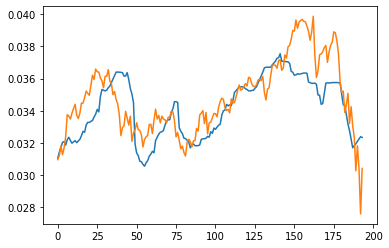

In [387]:
mdl = neighbors.KNeighborsRegressor(n_neighbors = 10, weights = "distance", algorithm = "auto")
mdl.fit(X_train, y_train)
pred = mdl.predict(X_test.reshape((X_test.shape[0], -1), order='F'))
plt.plot(pred)
plt.plot(y_test)

In [434]:
#config
lstm_size = 128
num_layers = 1
leep_prob = .8
batch_size = 64
init_learning_rate = .001
learning_rate_decay = .99
init_epoch = 5
max_epoch = 50

In [389]:
from sklearn.linear_model import LinearRegression
mdl = LinearRegression()

In [390]:
X_train = X_train.reshape((X_train.shape[0], -1), order='F')
mdl.fit(X_train, y_train)
X_test = X_test.reshape((X_test.shape[0], -1), order='F')


In [391]:
pred = mdl.predict(X_test)

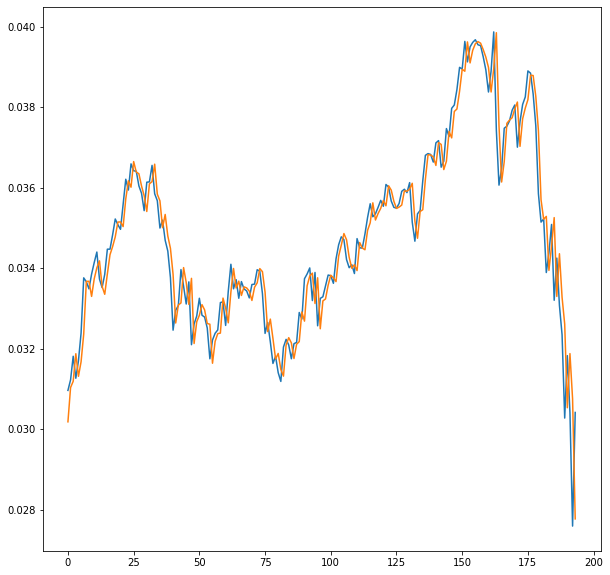

In [392]:
plt.figure(figsize = (10,10))
plt.plot(y_test)
plt.plot(pred)


In [303]:
from sklearn.metrics import mean_squared_error as mse
mse(pred, y_test)

14.606239975329933

In [435]:
from keras.callbacks import LambdaCallback
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import LSTM
from keras.optimizers import RMSprop
from keras.utils.data_utils import get_file
import numpy as np
import random
import sys
import io
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras import optimizers

In [468]:
#config
lstm_size = 128
num_layers = 1
leep_prob = .8
batch_size = 32
init_learning_rate = .001
learning_rate_decay = .99
init_epoch = 5
max_epoch = 50

In [469]:
lstm_model = Sequential()
lstm_model.add(LSTM(100, batch_input_shape=(batch_size, num_steps, X_train.shape[2]), dropout=0.0, recurrent_dropout=0.0, stateful=True,     kernel_initializer='random_uniform'))
lstm_model.add(Dropout(0.5))
lstm_model.add(Dense(20,activation='relu'))
lstm_model.add(Dense(1,activation='sigmoid'))
optimizer = optimizers.RMSprop()
lstm_model.compile(loss='mean_squared_error', optimizer=optimizer)

In [470]:
history = lstm_model.fit(X_train, y_train, epochs=max_epoch, verbose=2, batch_size=batch_size,shuffle=False)

ValueError: In a stateful network, you should only pass inputs with a number of samples that can be divided by the batch size. Found: 1743 samples

(1743, 30)

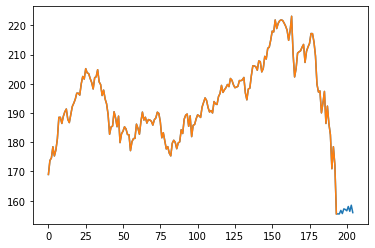

In [316]:

plt.plot(pred2)
plt.plot(pred)

